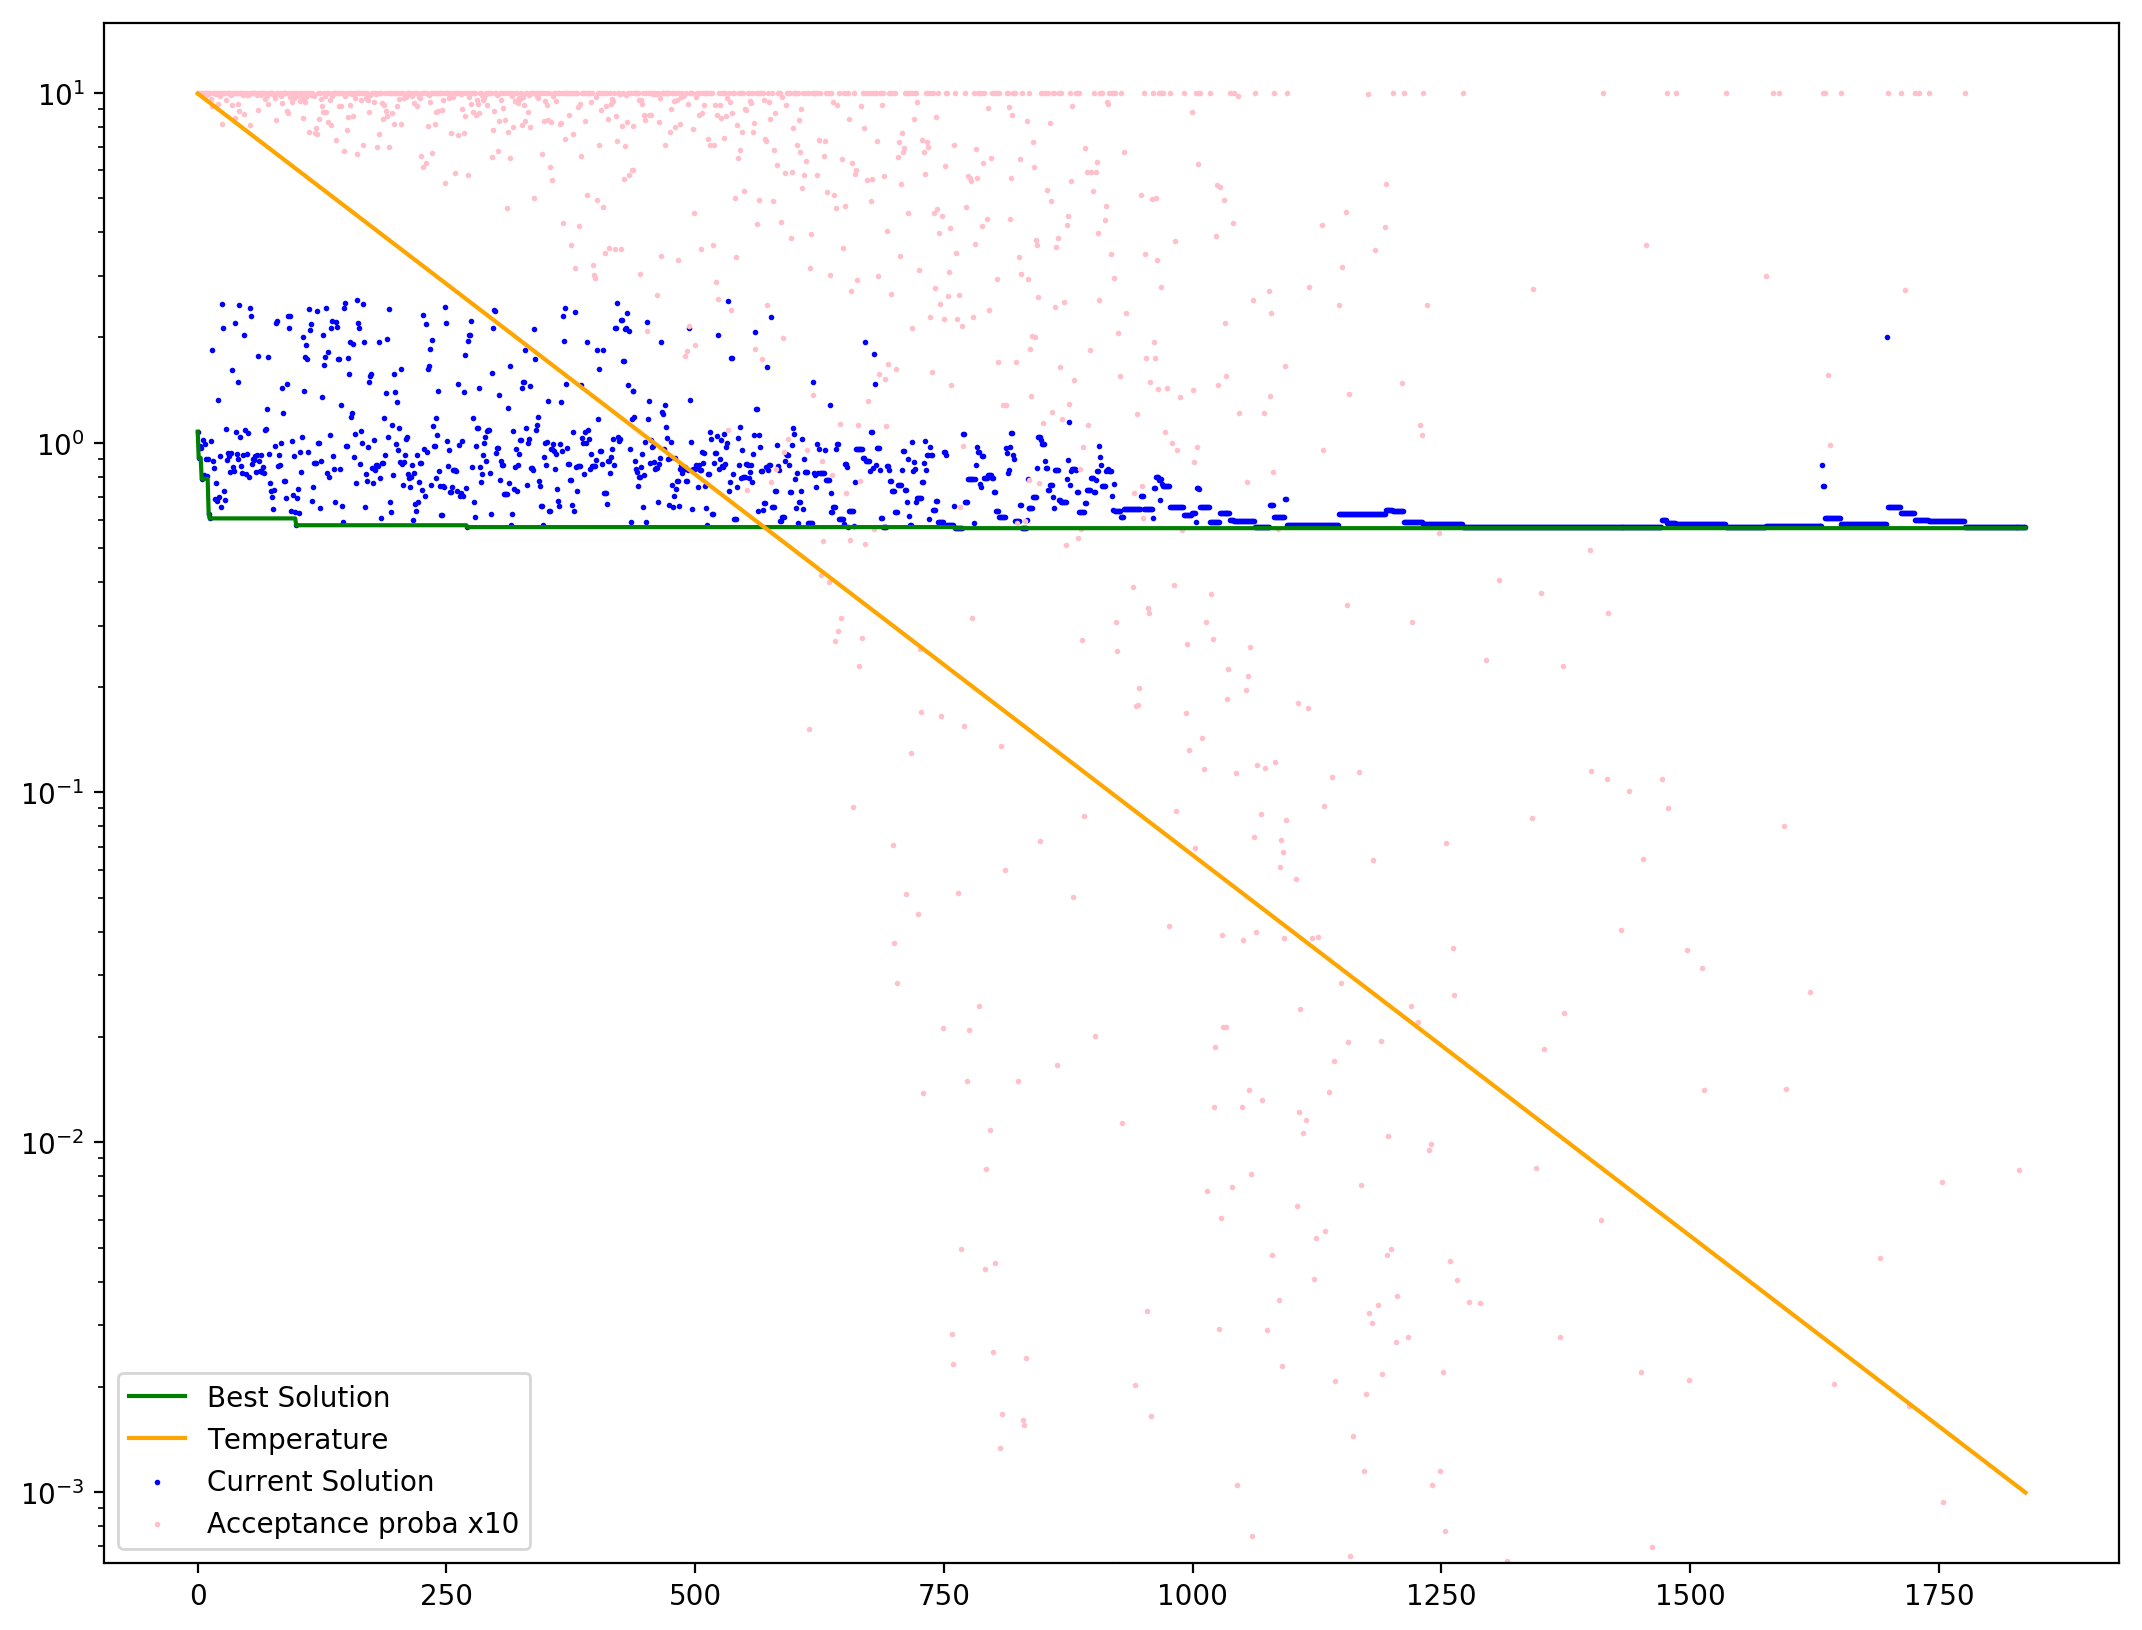

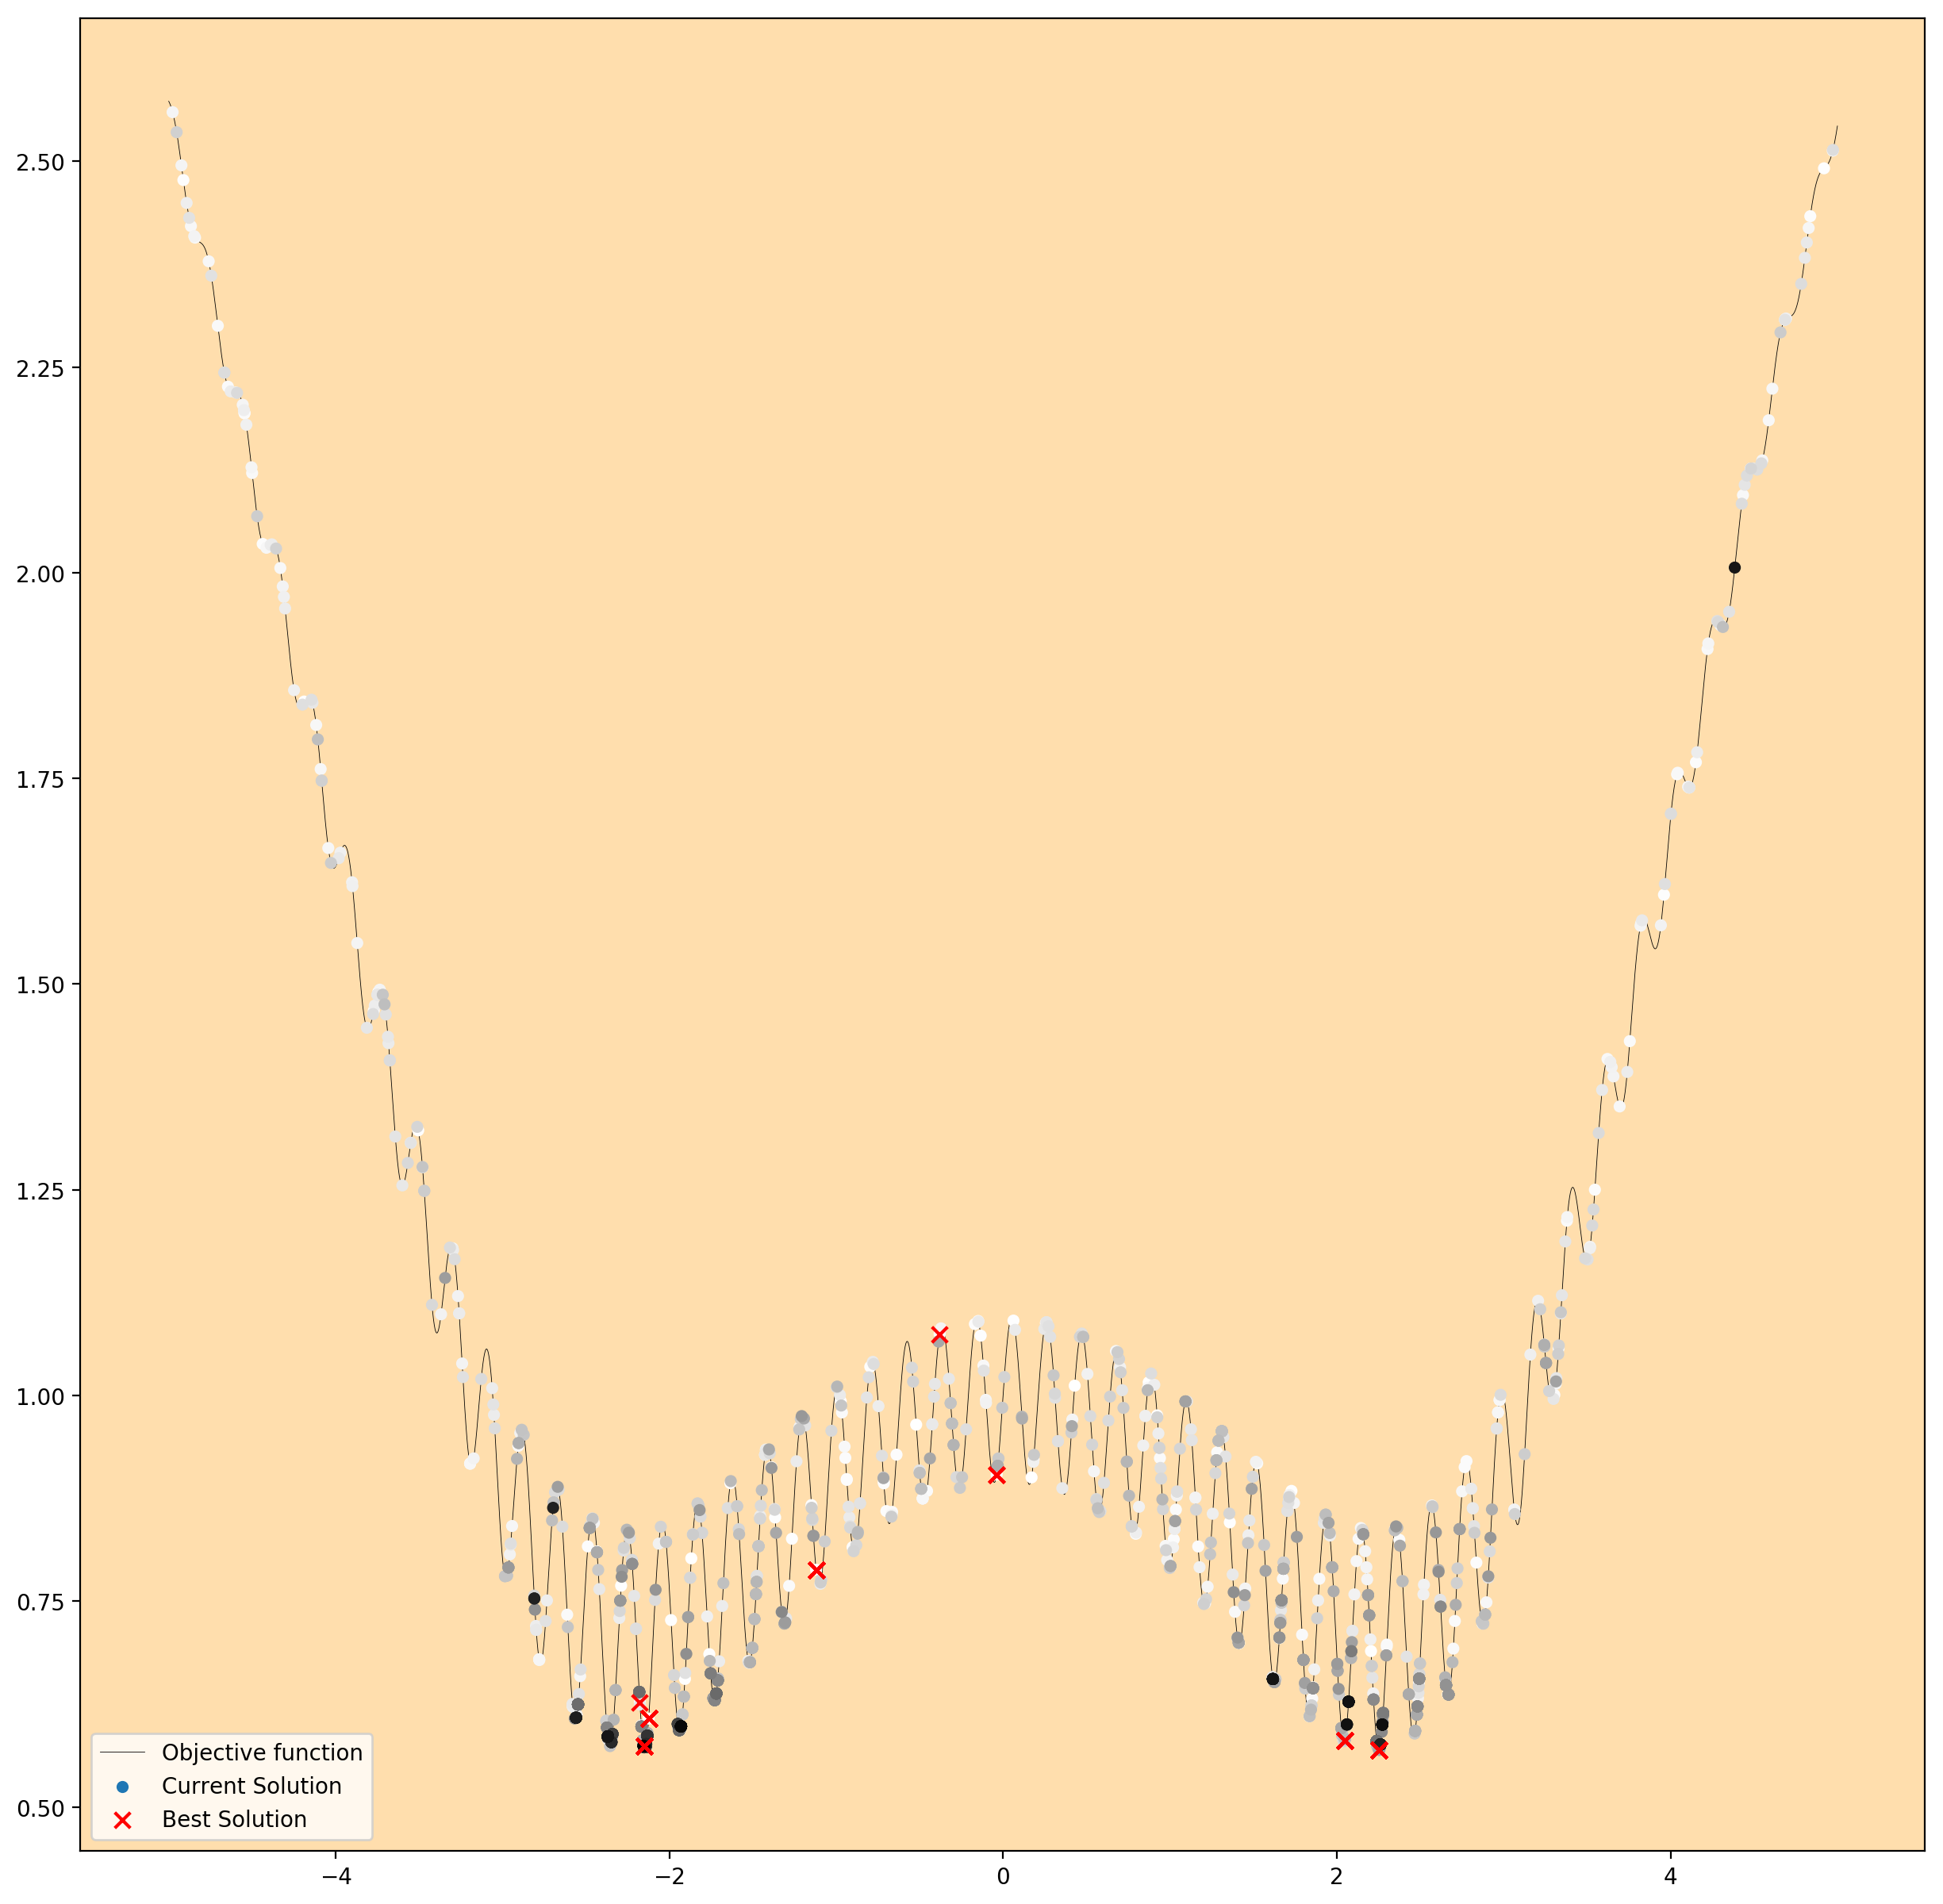

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%run ProcessData.ipynb
%run PlottingMethods.ipynb

# Running code

##      <span style="color:orange">A.  LSA</span>

###      <span style="color:green"><u>Traveling Salesman Problem</u></span>

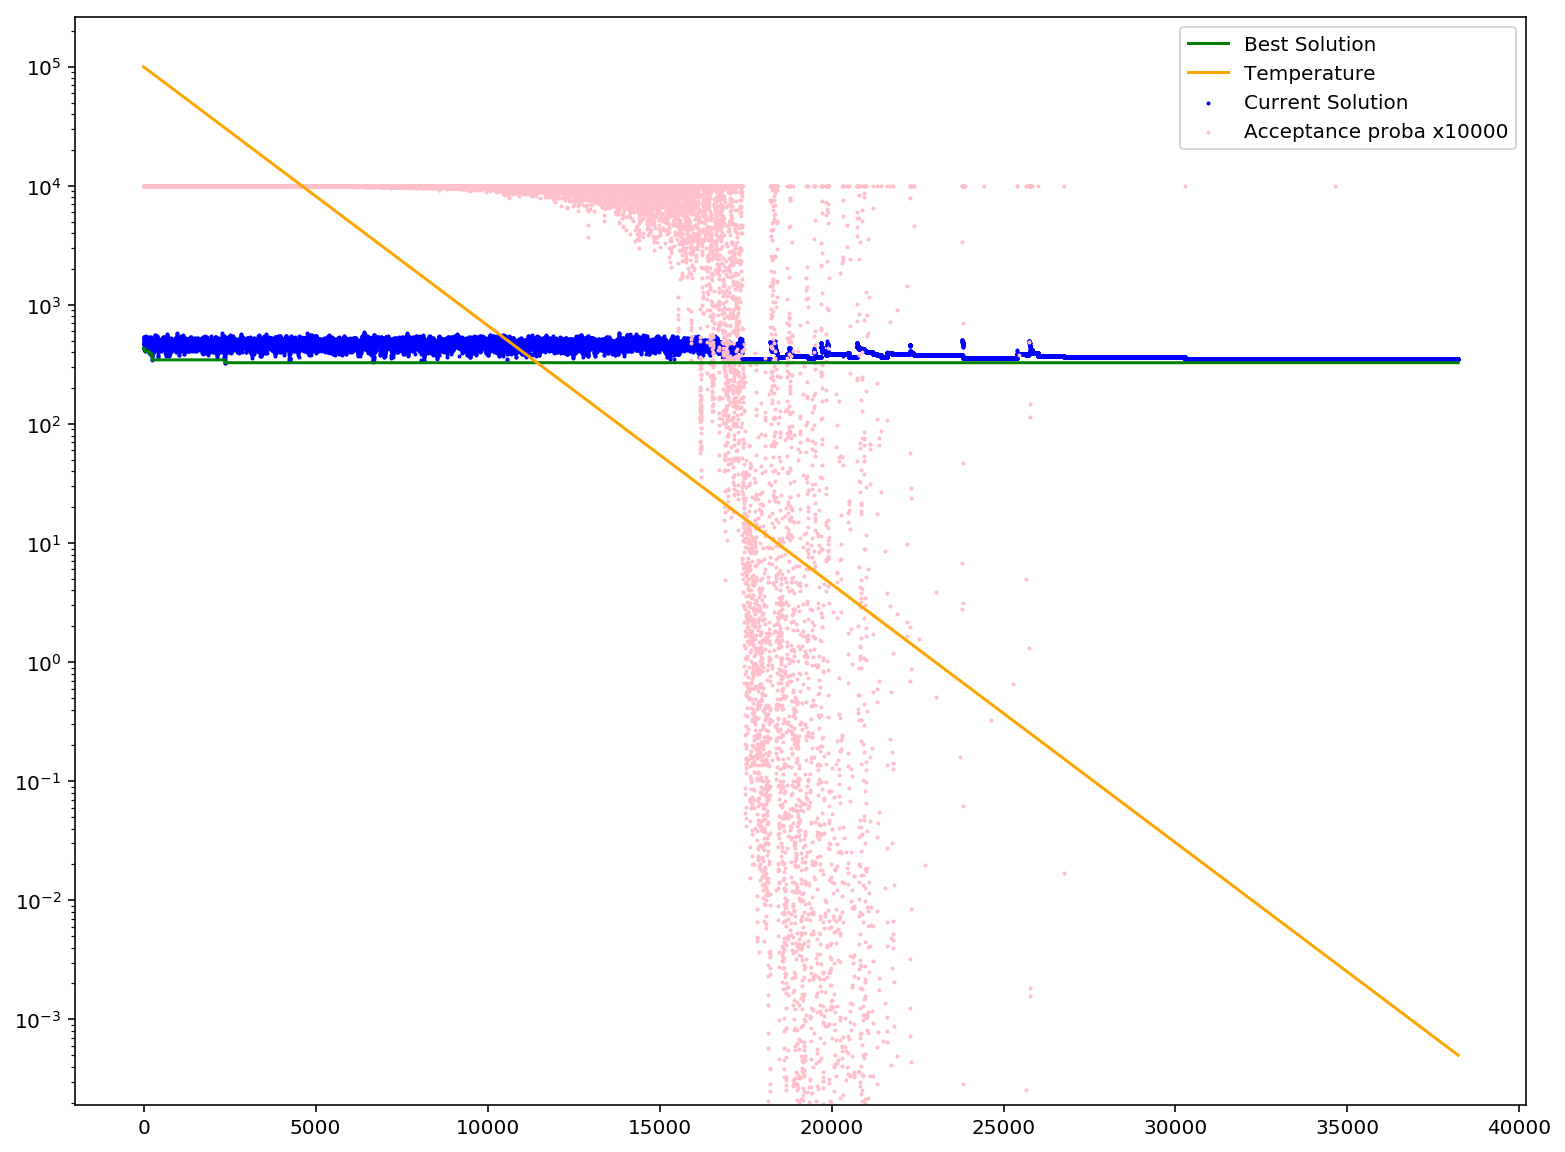

In [2]:
path = "../java/SimulatedAnnealing/GraphData/LSA_TSP.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 10000)

----
###      <span style="color:green"><u>Min Function</u></span>

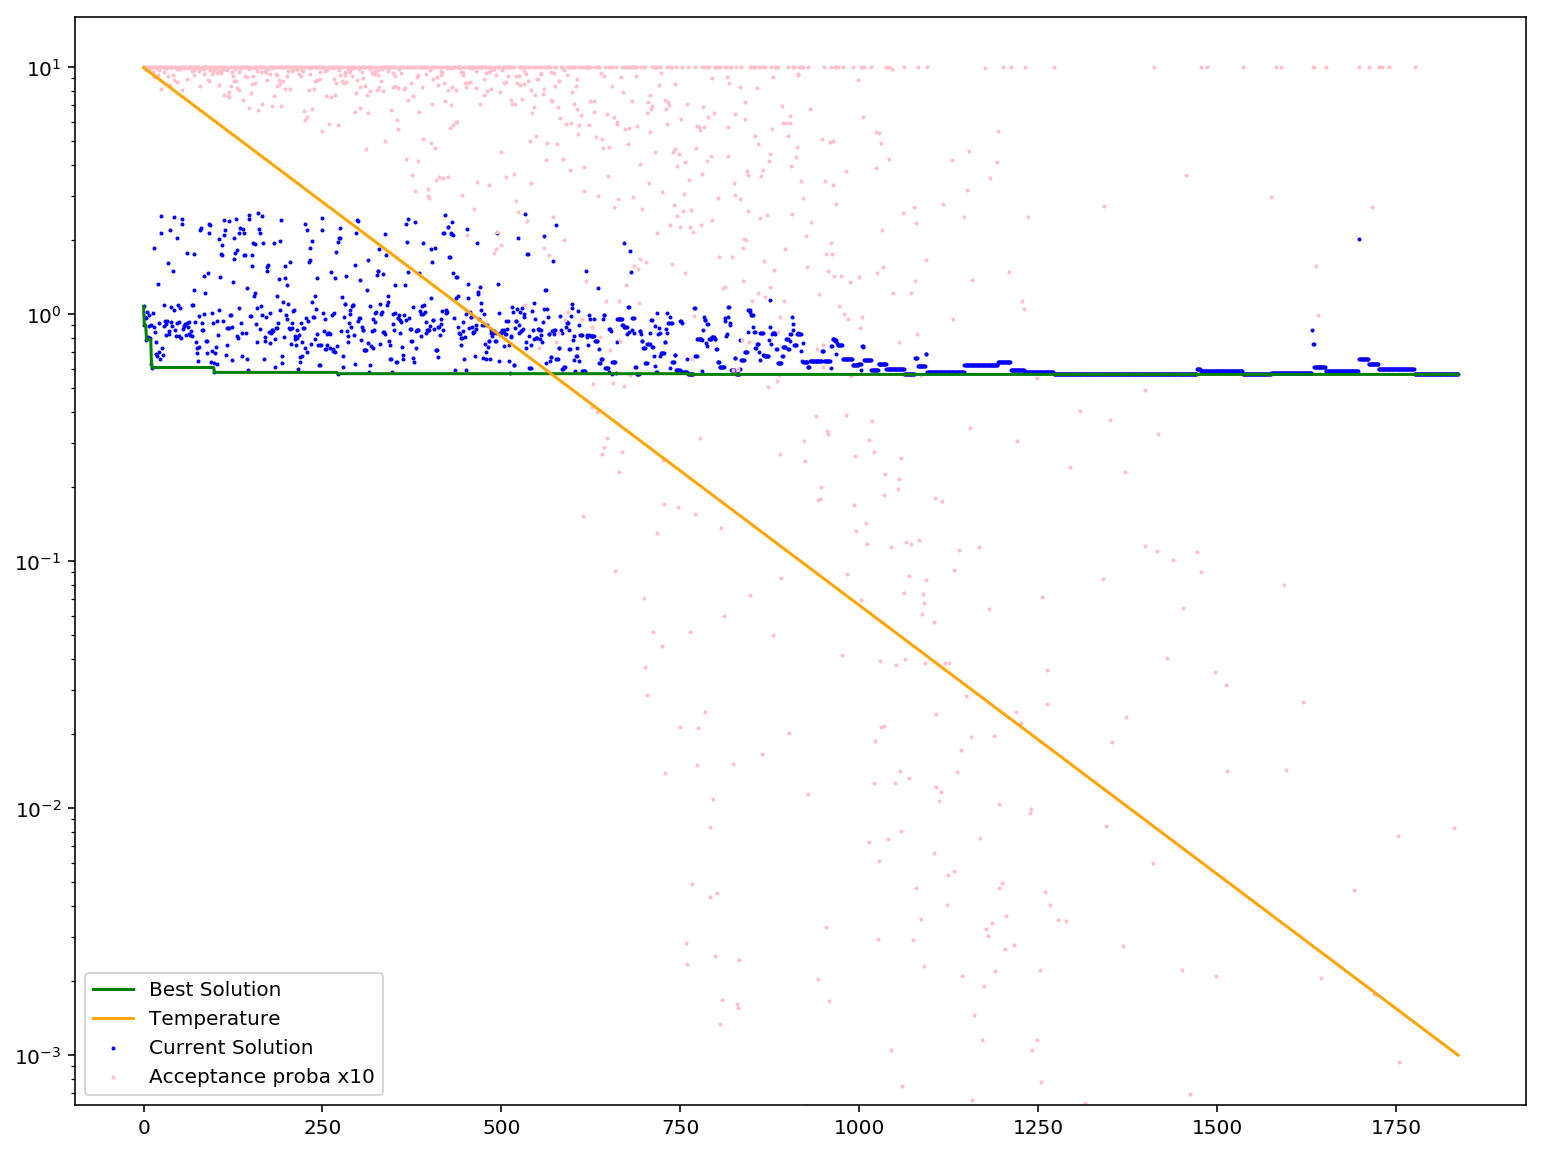

In [3]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 10)

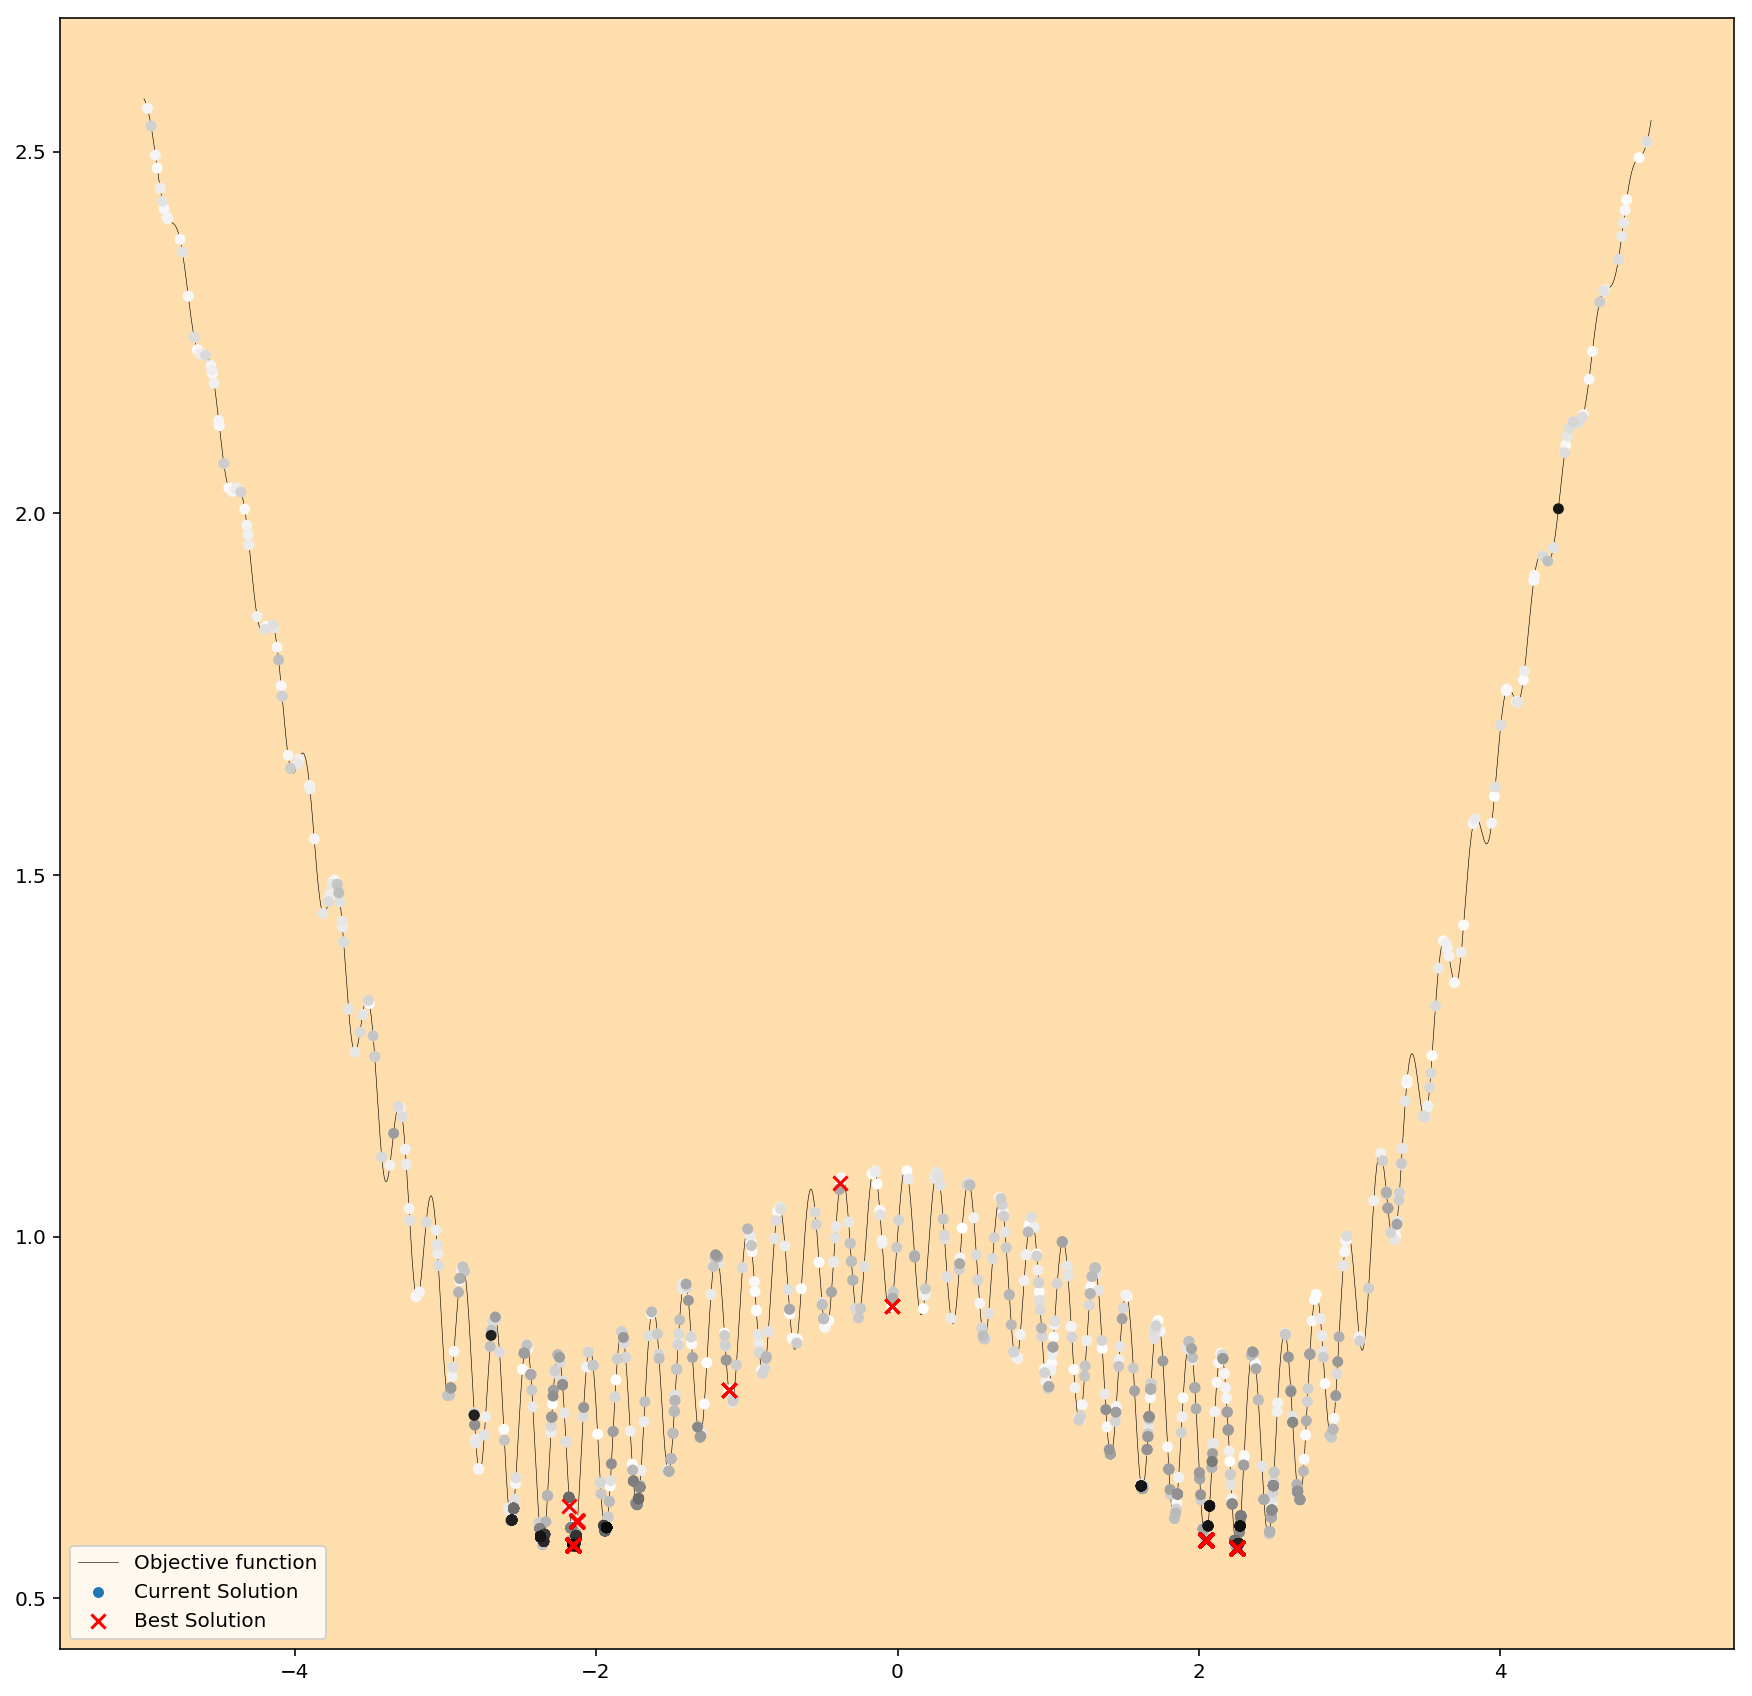

In [4]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction_currX.txt"
best_x, curr_x = processDataDSA_MF(path)
drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

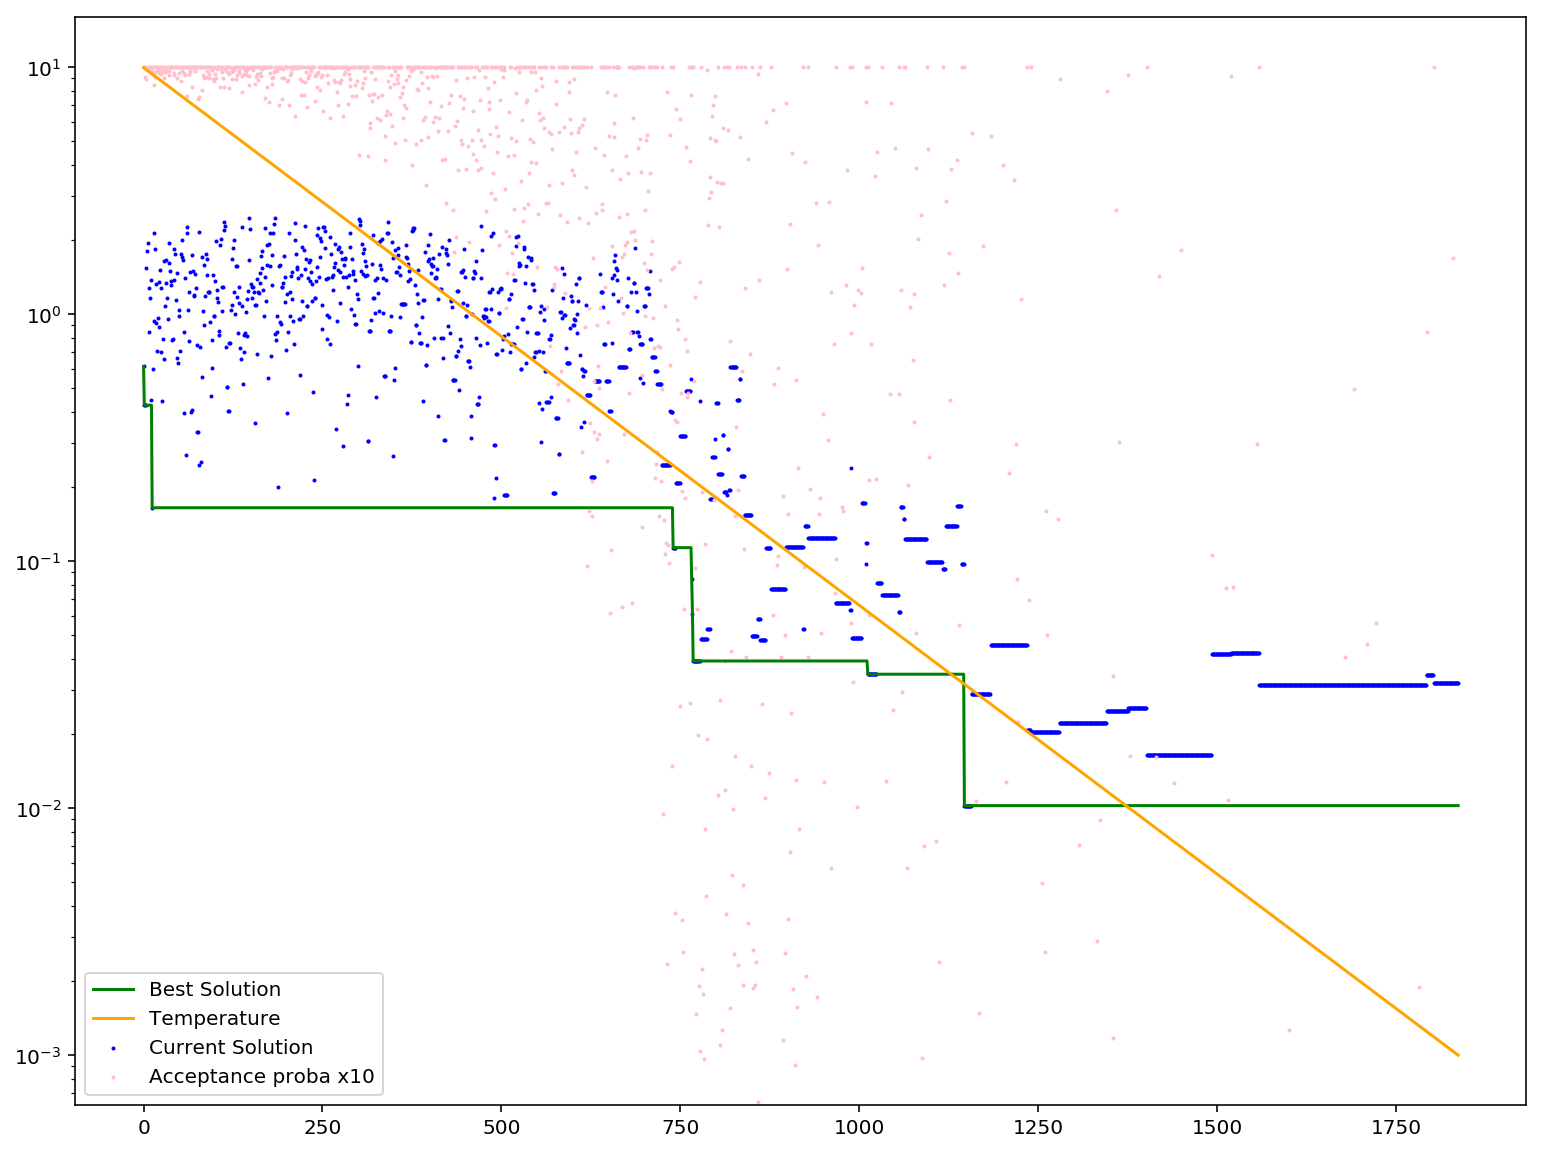

In [9]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction3D.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 10)

----

##      <span style="color:orange">B.  DSA</span>

###      <span style="color:green"><u>Min Function</u></span>

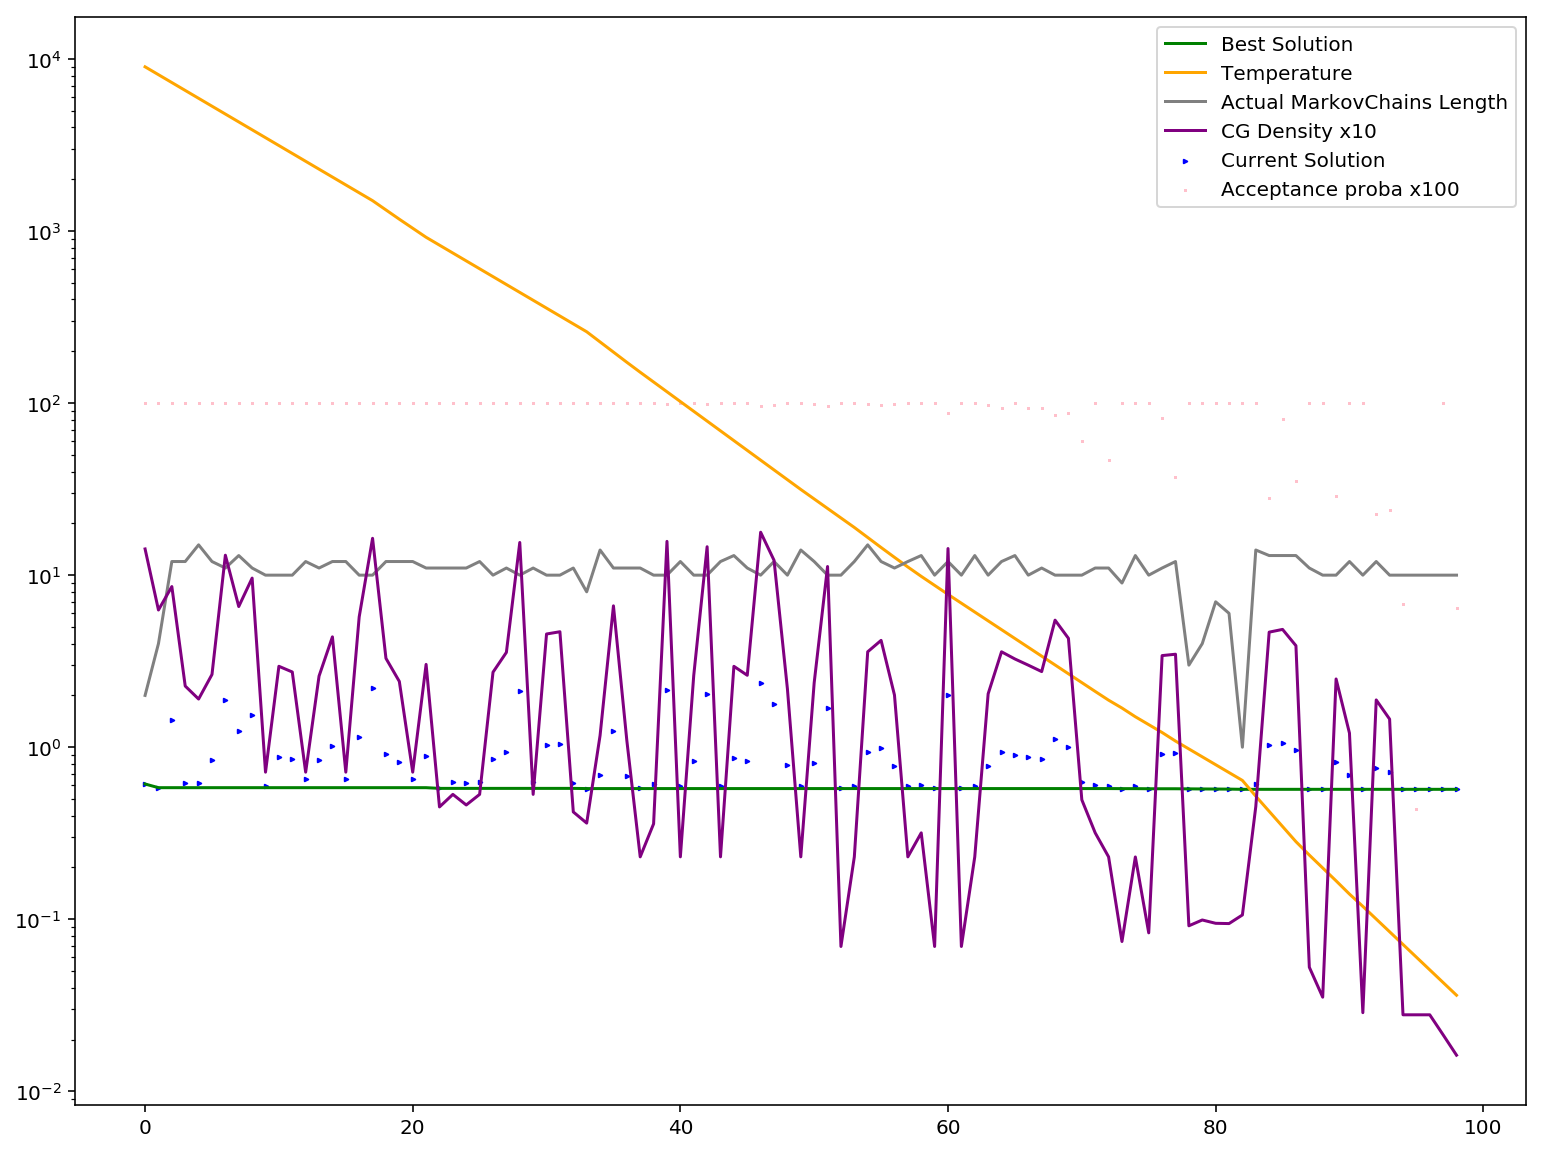

In [10]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, density, markov_len, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

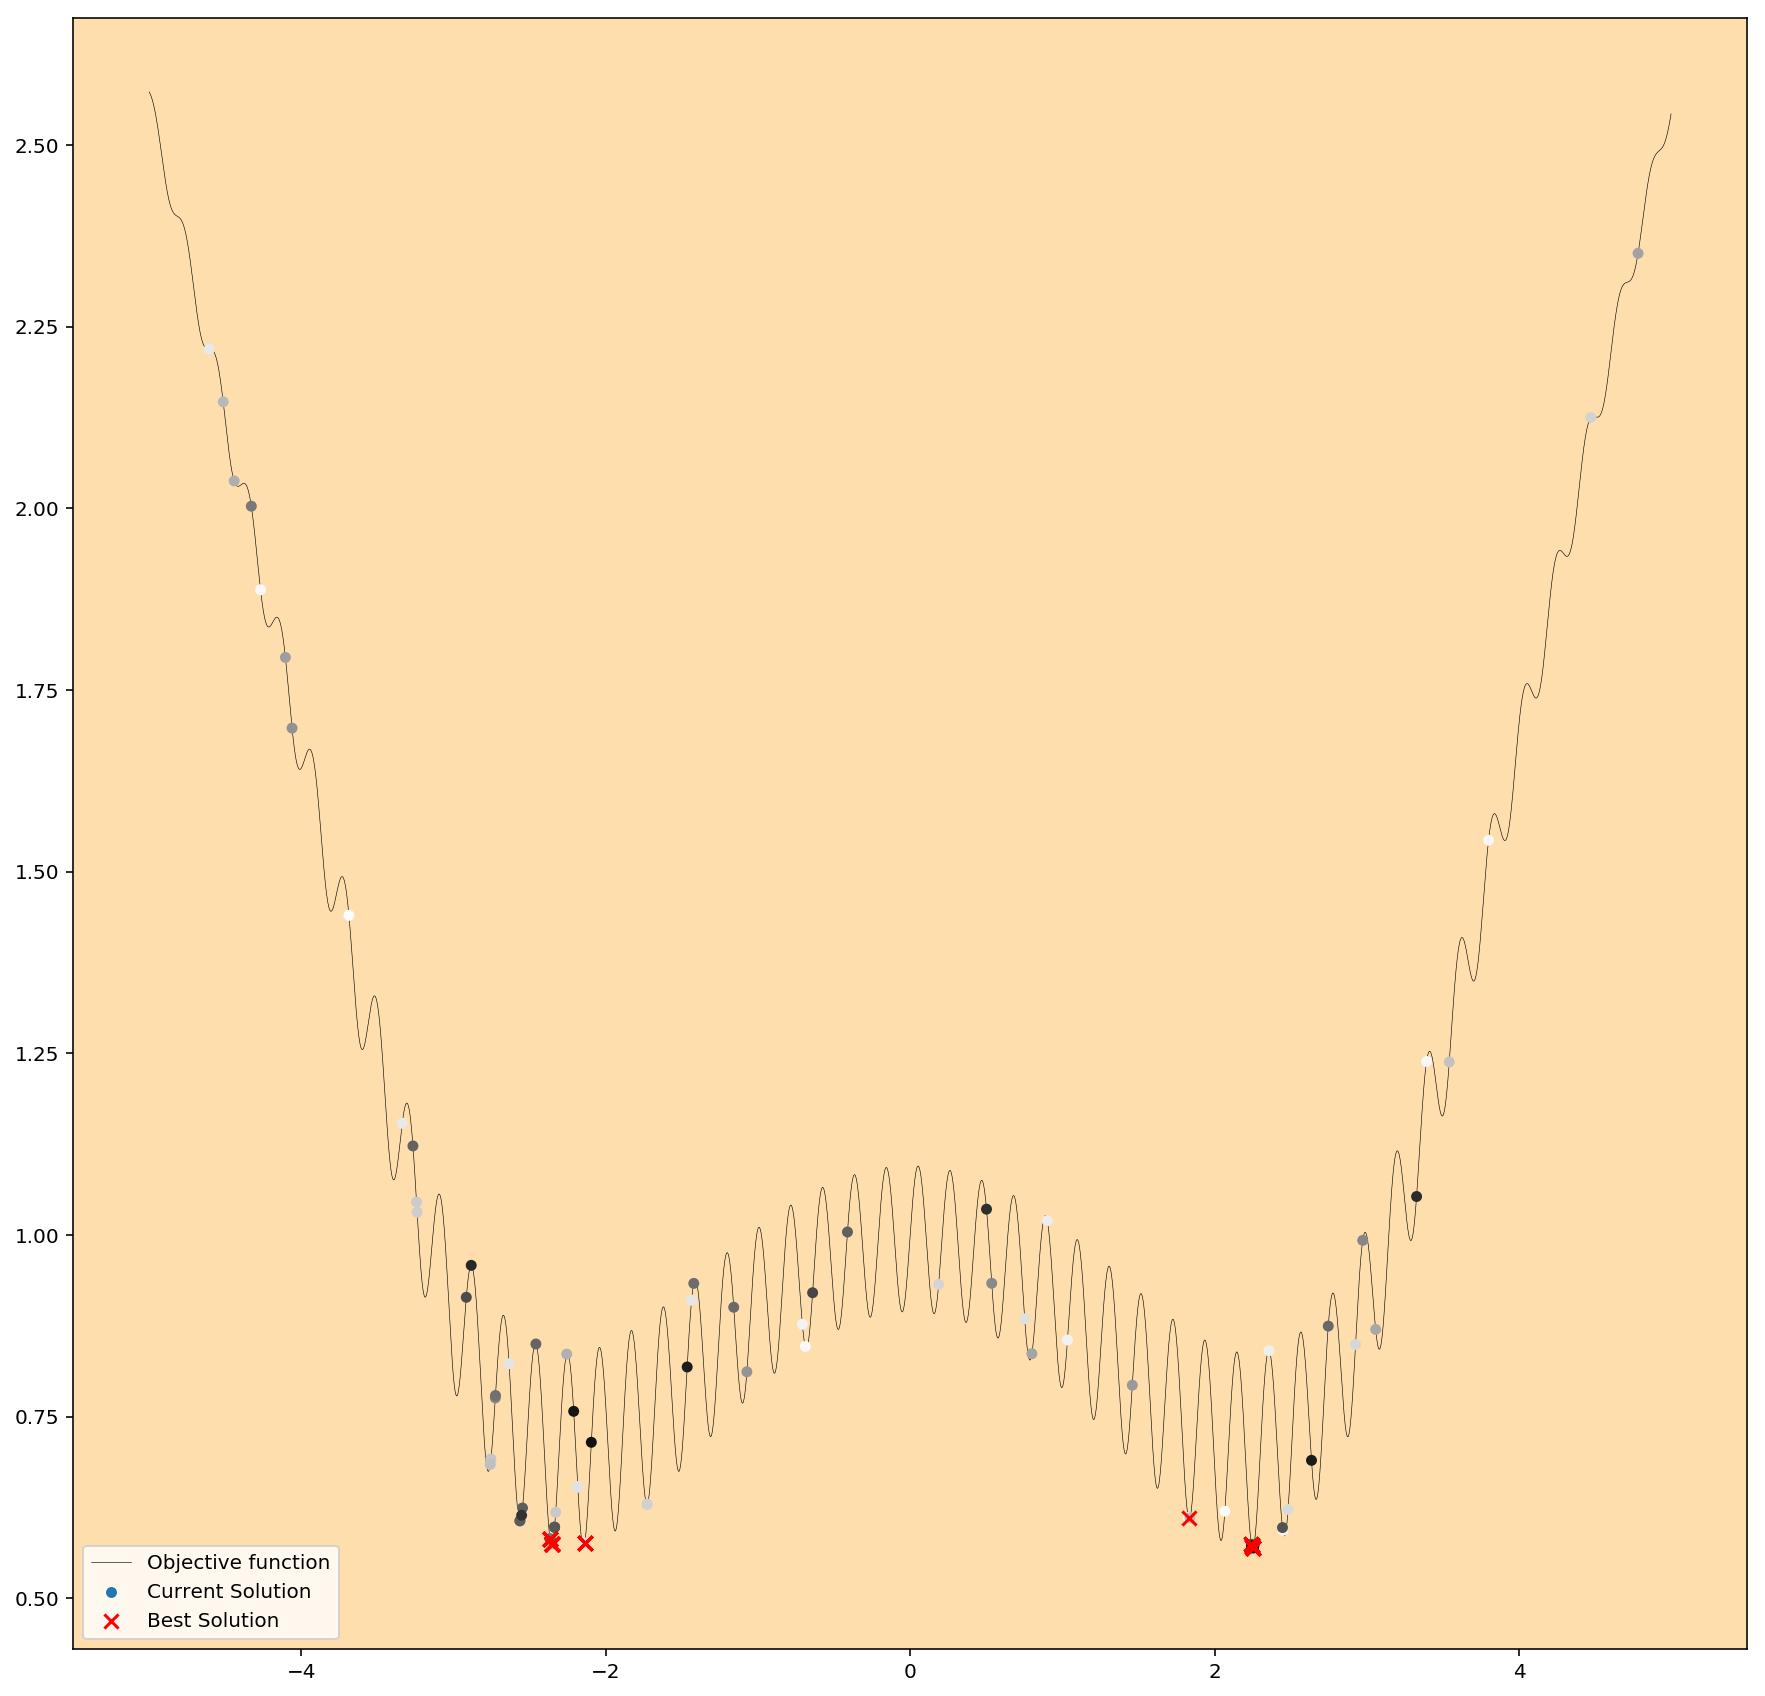

In [12]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction_currX.txt"
best_x, curr_x = processDataDSA_MF(path)
drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

###      <span style="color:green"><u>Min Function 3D</u></span>

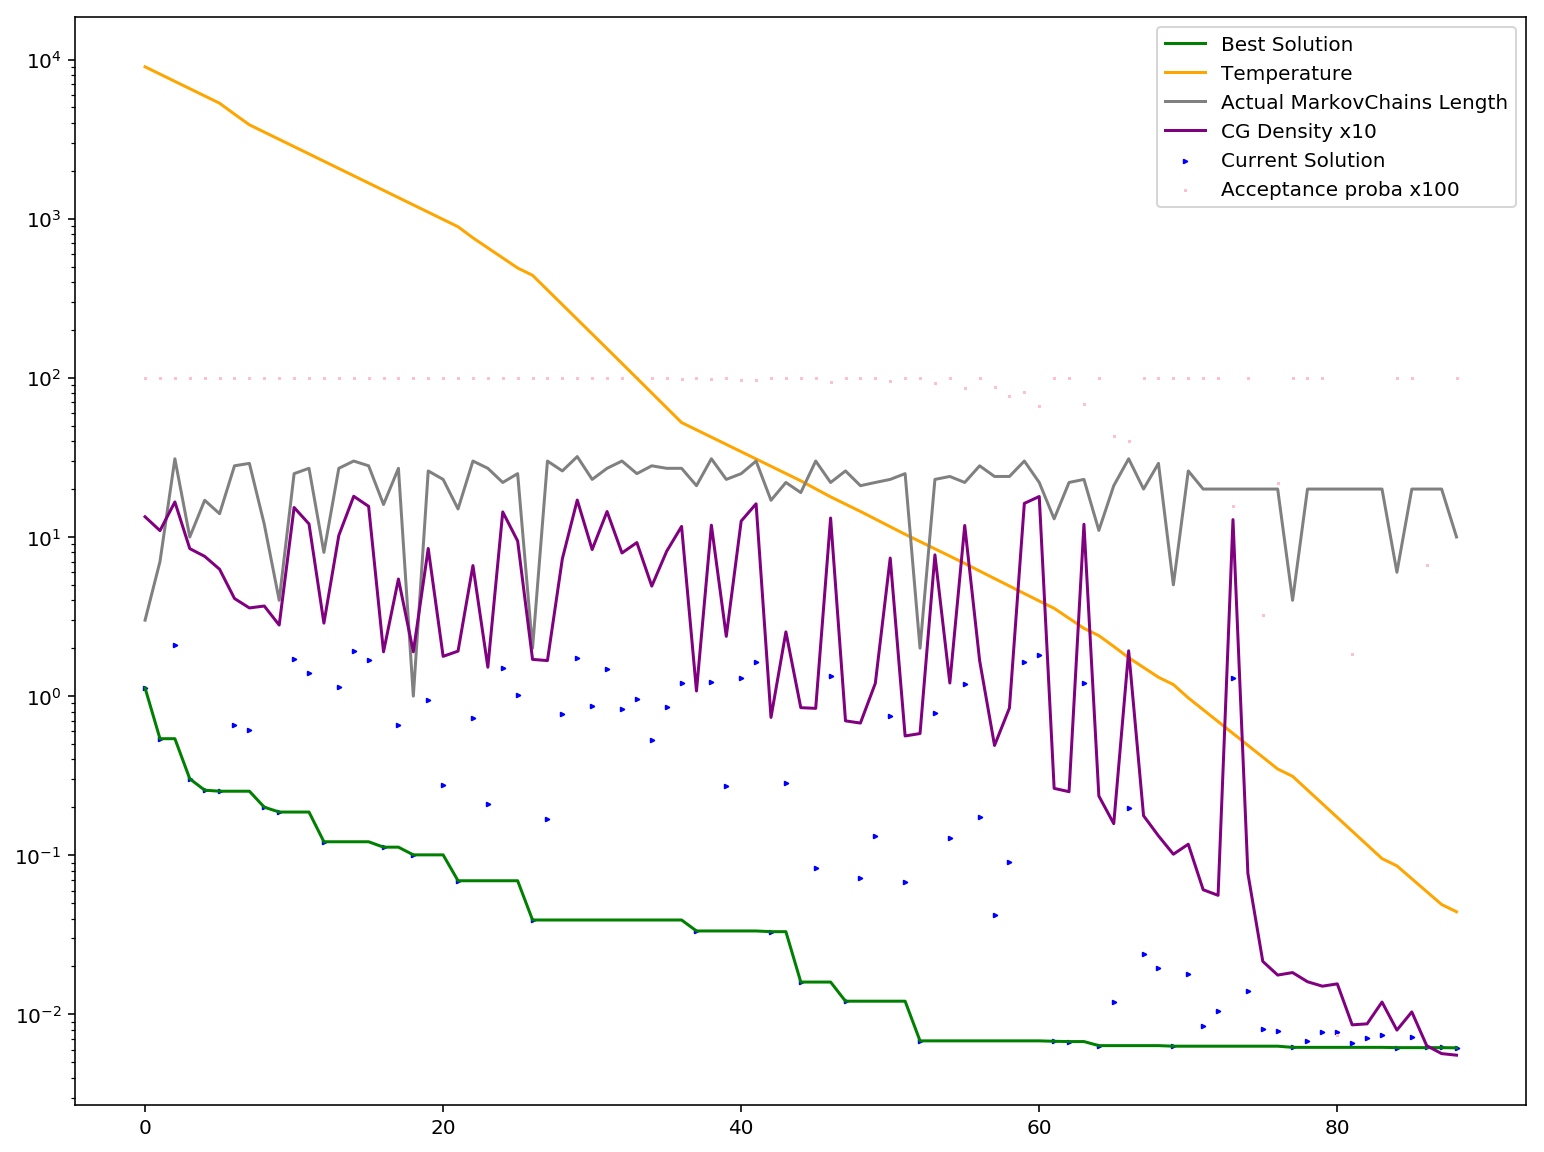

In [13]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction3D.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, density, markov_len, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

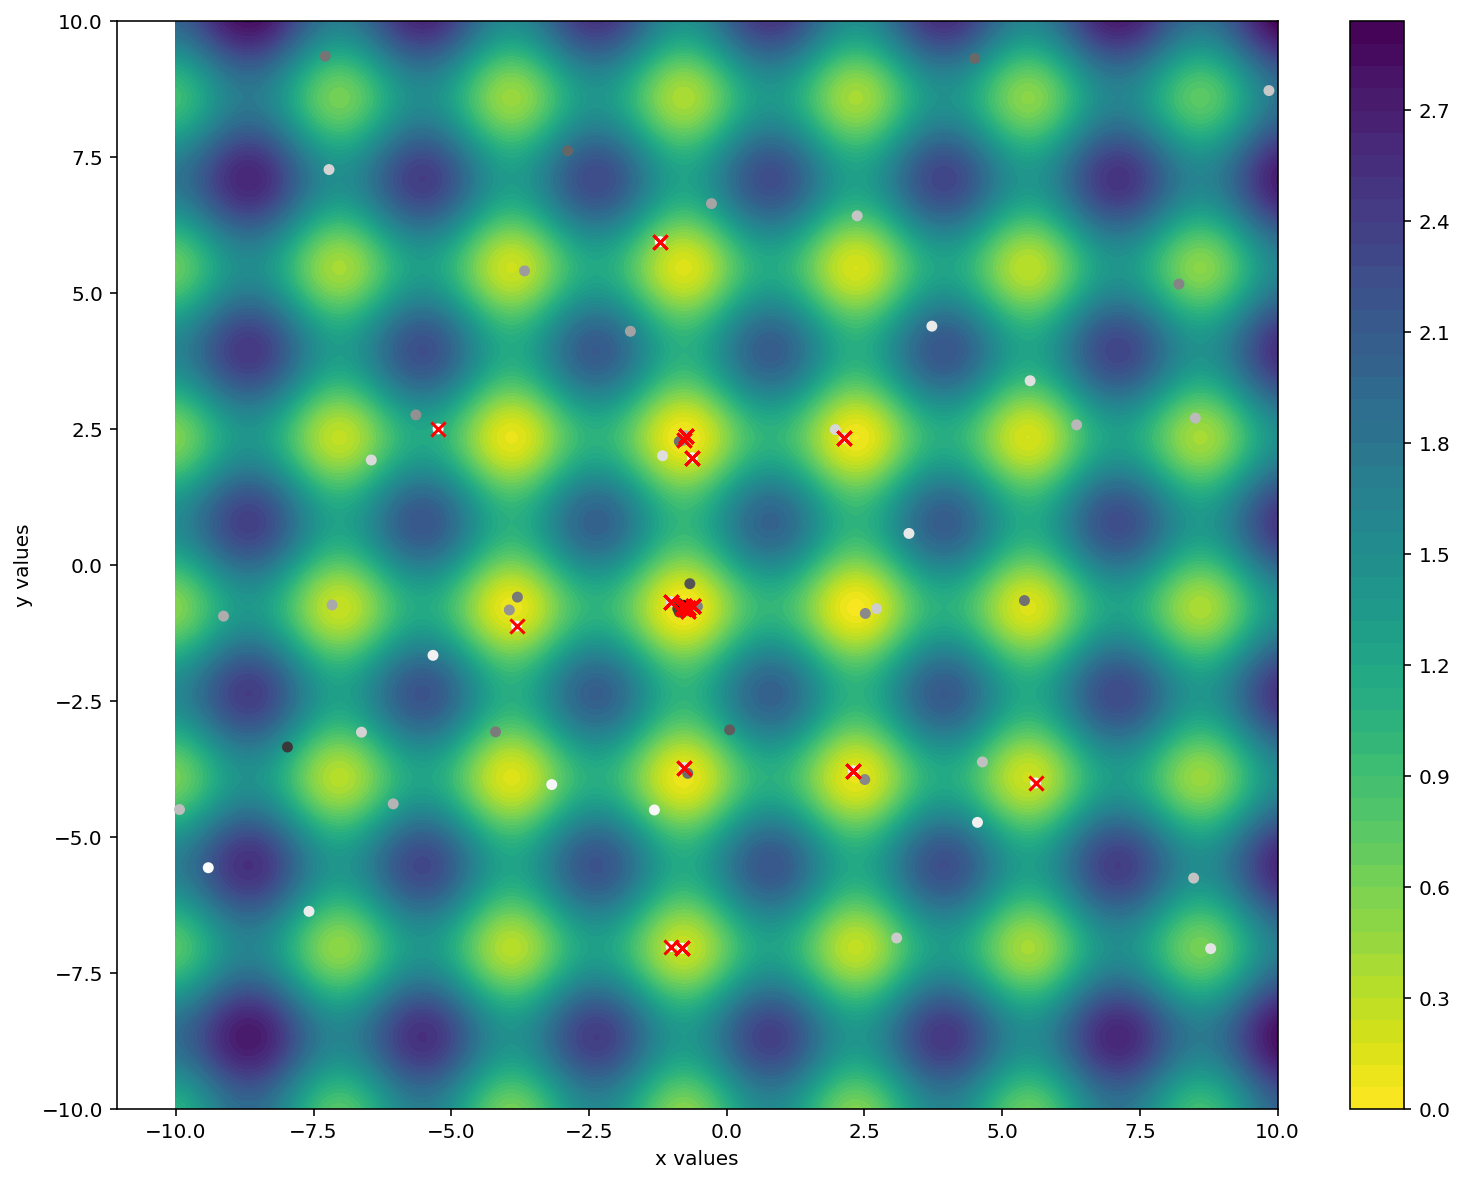

In [15]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction3D_currX.txt"
best_x, curr_x, best_y, curr_y = processDataDSA_MF3D(path)
drawSolutionDSAMF3D(curr_y, best_y, curr_x, best_x)